I'm going to analyze the Titanic Data for my project. First lets start by visualizing the data'

In [ ]:
low_class_passengers_female = low_class_passengers[low_class_passengers['Sex'] == 'female']
low_class_passengers_survived_female = low_class_passengers[low_class_passengers['Survived'] ==1][low_class_passengers['Sex'] == 'female']
low_class_passengers_perished_female = low_class_passengers[low_class_passengers['Survived'] ==0][low_class_passengers['Sex'] == 'female']

# Let's look at siblings and spouse on-board
print 'Mean number of Sibling / Spouse on-board for 3rd-class female passengers by port'
print low_class_passengers_female.groupby(['Embarked'], as_index=True)['SibSp'].mean().reset_index()
print ""
print 'Mean number of Sibling / Spouse on-board for surviving 3rd-class female passengers by port'
print low_class_passengers_survived_female.groupby(['Embarked'], as_index=True)['SibSp'].mean().reset_index()
print ""
print 'Mean number of Sibling / Spouse on-board for perished 3rd-class female passengers by port'
print low_class_passengers_perished_female.groupby(['Embarked'], as_index=True)['SibSp'].mean().reset_index()
print ""
# Let's look at parents and children on-board
print 'Mean number of Parents / Children on-board for 3rd-class female passengers by port'
print low_class_passengers_female.groupby(['Embarked'], as_index=True)['Parch'].mean().reset_index()
print ""
print 'Mean number of Parents / Children on-board for surviving 3rd-class female passengers by port'
print low_class_passengers_survived_female.groupby(['Embarked'], as_index=True)['Parch'].mean().reset_index()
print ""
print 'Mean number of Parents / Children on-board for perished 3rd-class female passengers by port'
print low_class_passengers_perished_female.groupby(['Embarked'], as_index=True)['Parch'].mean().reset_index()

In [12]:
# loading in the Titanic data to a pandas data frame

import pandas as pd
import numpy as np

titanic_df = pd.read_csv('titanic_data.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I loaded in the data and had a few questions:

1) Is there any correlation between where passengers embarked and survival? Since 'embarked' is not a numeric value, we would need to group by embarked and then look at different survival rates.

2) We could also look at embarkation and the fare or Pclass to see if there is a correlation between embarkation and socioeconomic status.

In [89]:
# I'm going to use my Pearson's R correlation function to quickly check out the correlation between a few \
# of the numeric variables

def correlation(x, y):
    mean_x = x.mean()
    mean_y = y.mean()
    std_x = x.std(ddof=0)
    std_y = y.std(ddof=0)
    standardized_x = (x - mean_x) / std_x
    standardized_y = (y - mean_y) / std_y
    raw_correlation = standardized_x * standardized_y
    correlation = raw_correlation.mean()
    return (correlation)

# x = pd.Series([1, 2, 3, 40])
# y = pd.Series([10, 11, 12, 13])

# print correlation(x, y). I'll do this for all numeric values as a first pass.

survival = titanic_df['Survived']
pclass = titanic_df['Pclass']
fare = titanic_df['Fare']
parent_children = titanic_df['Parch']
sibling_spouse = titanic_df['SibSp']
age = titanic_df['Age']

print "The Pearson's R value for 'Survival' and 'Class' is", correlation(survival, pclass)
print "The Pearson's R value for 'Survival' and 'Fare' is", correlation(survival, fare)
print "The Pearson's R value for 'Survival' and 'Parent/ Children' is", correlation(survival, parent_children)
print "The Pearson's R value for 'Survival' and 'Sibling/Spouse' is", correlation(survival, sibling_spouse)
print "The Pearson's R value for 'Survival' and 'Age' is", correlation(survival, age)

The Pearson's R value for 'Survival' and 'Class' is -0.338481035961
The Pearson's R value for 'Survival' and 'Fare' is 0.257306522385
The Pearson's R value for 'Survival' and 'Parent/ Children' is 0.0816294070835
The Pearson's R value for 'Survival' and 'Sibling/Spouse' is -0.0353224988857
The Pearson's R value for 'Survival' and 'Age' is -0.0779826784139


This output is roughly what one would expect. There is a 'moderate positive correlation'(Pearson's correlation = 0.3384) between survival and higher ticket class. Keep in mind that this correlation reads out as negative since lower ticket class means a higher numeric value associated with class (i.e. low class = 3, middle class = 2, and high class = 1). I have to decide if I want to deal with this discrepancy later. 

Additionally, I did a simple check to see if fare and pclass are correlated. As expected, they are reasonabley well correlated (Pearson's correlation of 0.5495) indicating that people in higher class paid a higher fare. Again, the correlation value is negative despite a positive correlation because of the numeric.

Interestingly, there is minimal correlation with whether people had family on-board, either in the form of parent/child members or sibling/spouce members. This lack of correlation actually surprised me.

In [95]:
# Now I want to look at some non-numeric values as a first pass. The only ones that makes sense to me are 'Sex' and\
# 'Embarkation', since things like cabin number aren't very relevant. I'll do this by grouping by these values.


# passengers_grouped_by_port = titanic_df.groupby('Embarked', as_index=False)
# mean_survival = passengers_grouped_by_port['Survived'].mean()

print "The surviving fraction of all passengers on the titanic was" , titanic_df['Survived'].mean()
print ""
print "The surviving fraction of passengers by embarkation port is summarized below:" 
print (titanic_df.groupby('Embarked', as_index=False))['Survived'].mean()
print ""
print "The surviving fraction of passengers by sex is summarized below:"
print (titanic_df.groupby('Sex', as_index=False))['Survived'].mean()

The surviving fraction of all passengers on the titanic was 0.383838383838

The surviving fraction of passengers by embarkation port is summarized below:
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

The surviving fraction of passengers by sex is summarized below:
      Sex  Survived
0  female  0.742038
1    male  0.188908


This is interersting. It looks like passengers who embarked at Cherbourg, France survived at a higher rate (55.4%) than those who embarked at Queenstown, Ireland (39.0%) or Southampton, England (33.7%). (this may be relevant later, but the route was Southampton, Cherbourg, then Queenstown.)

Now I'm interested in looking at the socioeconomic factors at play.

1) What is the average fare paid for the different ports? This data will be confounded by the fact that passengers would be paying for different lengths of journey. Looking at the distribution of class might be better.

2) Are people from these different ports different 'types of travelers' in terms of family aboard or age?


In [31]:
# Frist lets quickly look at the breakdown of ticket class by embarkation port. It's pretty clear that there are \
# differences in the passenger breakdown for thes ports.

mean_class_by_port = passengers_grouped_by_port['Pclass'].mean()
mean_fare_by_port = passengers_grouped_by_port['Fare'].mean()

print "The table below summarizes the mean class by port"
print mean_class_by_port
print ""
print "The table below summarizes the mean fare by port"
print mean_fare_by_port

The table below summarizes the mean class by port
  Embarked    Pclass
0        C  1.886905
1        Q  2.909091
2        S  2.350932

The table below summarizes the mean fare by port
  Embarked       Fare
0        C  59.954144
1        Q  13.276030
2        S  27.079812


Populating the interactive namespace from numpy and matplotlib


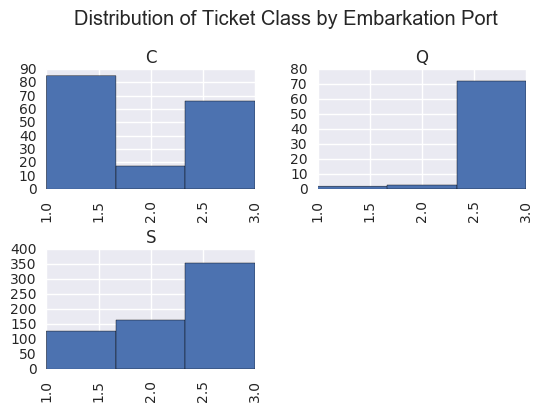

In [46]:
# Lets take a look at the questions above. I'd like to look at class distributions as a histogram. This seems \
# like an easy way to visualize the breakdowns

### I can't figure out the axis labeling... I'm going to have to come back to this.

%pylab inline

import matplotlib.pyplot as plt
import seaborn as sns

titanic_df['Pclass'].hist(by=titanic_df['Embarked'], bins=3)
plt.suptitle('Distribution of Ticket Class by Embarkation Port', x=0.5, y=1.05, ha='center', fontsize='x-large')

In [57]:
# Hummm, let's see if the 3rd class passengers from the same class but different embarkation ports survived at \
# similar rates:

# First let's look at gender and class. It looks like it's better to be a woman and better to be rich.
passengers_grouped_by_sex_class = titanic_df.groupby(['Sex', 'Pclass'])
# print passengers_grouped_by_sex['Survived'].mean()

# Next let's see if this breakdown is similar for the different embarkation ports. Wow, it looks really bad to be\
# an Irish male regardless of class. Let's double check the data to see how many Irish men there were.
passengers_grouped_by_port_grouped_by_class = titanic_df.groupby(['Embarked', 'Pclass', 'Sex'], as_index=False)
print passengers_grouped_by_port_grouped_by_class['Survived'].mean()

# Gender breakdowns by port. It certainly looks like Irish men fared very badly.

passengers_grouped_by_sex_embarkation = titanic_df.groupby(['Sex','Embarked'])
print passengers_grouped_by_sex_embarkation['Survived', 'Pclass', 'Age', 'SibSp','Parch'] .mean()

   Embarked  Pclass     Sex  Survived
0         C       1  female  0.976744
1         C       1    male  0.404762
2         C       2  female  1.000000
3         C       2    male  0.200000
4         C       3  female  0.652174
5         C       3    male  0.232558
6         Q       1  female  1.000000
7         Q       1    male  0.000000
8         Q       2  female  1.000000
9         Q       2    male  0.000000
10        Q       3  female  0.727273
11        Q       3    male  0.076923
12        S       1  female  0.958333
13        S       1    male  0.354430
14        S       2  female  0.910448
15        S       2    male  0.154639
16        S       3  female  0.375000
17        S       3    male  0.128302
                 Survived    Pclass        Age     SibSp     Parch
Sex    Embarked                                                   
female C         0.876712  1.726027  28.344262  0.547945  0.493151
       Q         0.750000  2.888889  24.291667  0.222222  0.222222
       S  

In [97]:
# Seeing the 1 and 0's for the survival data made me suspicious, so I wanted to check the actual passenger numbers. \
# This isn't a huge data set so there could be really low sample numbers in these subsets.

# As I expected, there are only 1 1st Class male and 1 2nd Class male departing from Queensland. Thus, while it is \
# still bad to be an Irish male, the data might reflect more of the socioeconomic trends than pure port of departure.

print titanic_df.groupby(['Embarked','Sex','Pclass']).size()

Embarked  Sex     Pclass
C         female  1          43
                  2           7
                  3          23
          male    1          42
                  2          10
                  3          43
Q         female  1           1
                  2           2
                  3          33
          male    1           1
                  2           1
                  3          39
S         female  1          48
                  2          67
                  3          88
          male    1          79
                  2          97
                  3         265
dtype: int64


Wow, this data makes it very clear that 1) it's better to be a women, and 2) it's very bad to be an Irish man. A high status man departing from Queensland Ireland fared far worse than a high status man departing from Southampton or Cherbourg.

In [56]:
survival = titanic_df['Survived']
pclass = titanic_df['Pclass']
fare = titanic_df['Fare']

print correlation(survival, pclass)
print correlation(fare, pclass)

-0.338481035961
-0.549499619944


In [10]:
# Now let's look at passenger's family make up for the different ports

print passengers_grouped_by_port['SibSp', 'Parch', 'Age'].mean()
print passengers_grouped_by_port['SibSp', 'Parch', 'Age'].max()
print passengers_grouped_by_port['SibSp', 'Parch', 'Age'].min()

             SibSp     Parch        Age
Embarked                               
C         0.386905  0.363095  30.814769
Q         0.428571  0.168831  28.089286
S         0.571429  0.413043  29.445397
          SibSp  Parch   Age
Embarked                    
C             2      3  71.0
Q             4      5  70.5
S             8      6  80.0
          SibSp  Parch   Age
Embarked                    
C             0      0  0.42
Q             0      0  2.00
S             0      0  0.67


Poor people travel with siblings and spouses, and richer people are more likely to travel with parents and children. This doesn't tell us that much yet. Nearly all of the passengers were the same median age. Let's try looking at the gender breakdown of these classes. 

For example, were there more men traveling from Queensland? Perhaps these were economic migrants less likely to travel with children or parents.

In [ ]:
# Let's try to get some counts here.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%pylab inline

#Try this next time
sns.countplot(x='age_group', hue='response', data=df.sort("response"), palette="Greens_d")
titanic_df['Sex'].hist(by=titanic_df['Embarked'], bins=2)

/Users/jeff/anaconda/envs/DAND/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


NameError: name 'sns' is not defined

In [142]:
# making a data frame out of a group by object!!! Use the reset_index() function

passengers_grouped_by_port_df = titanic_df.groupby('Embarked').mean().reset_index()
print passengers_grouped_by_port_df.head()

plt.bar(passengers_grouped_by_port_df['Survived'])

  Embarked  PassengerId  Survived    Pclass        Age     SibSp     Parch  \
0        C   445.357143  0.553571  1.886905  30.814769  0.386905  0.363095   
1        Q   417.896104  0.389610  2.909091  28.089286  0.428571  0.168831   
2        S   449.527950  0.336957  2.350932  29.445397  0.571429  0.413043   

        Fare  
0  59.954144  
1  13.276030  
2  27.079812  


TypeError: bar() takes at least 2 arguments (1 given)

In [104]:
#I know that the numbers of passengers that embarked at each port is quite different. Thus, I want to calculate a 

unique_class = titanic_df.Pclass.unique()
port_counts_C = (titanic_df["Embarked"]=='C').value_counts()
port_counts_S = (titanic_df["Embarked"]=='S').value_counts()
port_counts_Q = (titanic_df["Embarked"]=='Q').value_counts()

print port_counts_C
print port_counts_S
print port_counts_Q

False    723
True     168
Name: Embarked, dtype: int64
True     644
False    247
Name: Embarked, dtype: int64
False    814
True      77
Name: Embarked, dtype: int64


In [131]:
new_data_frame = titanic_df[['Embarked', 'Pclass', 'Sex', 'Survived', 'Parch', 'SibSp']].copy()

# def norm_column(df,column):
#     column_unique = df[column].unique()
#     for i in column_unique:
#         count = df[column].value_counts()
#         norm_count = 1/count
#     norm_data_frame = new_data_frame + norm_count
#     return norm_data_frame
    
# print norm_column(new_data_frame, 'Embarked').head()
new_data_frame.head()

,Embarked,Pclass,Sex,Survived,Parch,SibSp
0,S,3,male,0,0,1
1,C,1,female,1,0,1
2,S,3,female,1,0,0
3,S,1,female,1,0,1
4,S,3,male,0,0,0


In [141]:
new_data_frame.groupby(['Embarked','Sex','Survived']).count() / new_data_frame.groupby(['Embarked']).count()

Parch    Pclass  Sex     SibSp  Survived
Embarked Sex    Survived                                             
C        female 0         0.053571  0.053571  NaN  0.053571       NaN
                1         0.380952  0.380952  NaN  0.380952       NaN
         male   0         0.392857  0.392857  NaN  0.392857       NaN
                1         0.172619  0.172619  NaN  0.172619       NaN
Q        female 0         0.116883  0.116883  NaN  0.116883       NaN
                1         0.350649  0.350649  NaN  0.350649       NaN
         male   0         0.493506  0.493506  NaN  0.493506       NaN
                1         0.038961  0.038961  NaN  0.038961       NaN
S        female 0         0.097826  0.097826  NaN  0.097826       NaN
                1         0.217391  0.217391  NaN  0.217391       NaN
         male   0         0.565217  0.565217  NaN  0.565217       NaN
                1         0.119565  0.119565  NaN  0.119565       NaN

In [140]:
new_data_frame.groupby(['Embarked','Sex']).count()

Pclass  Survived  Parch  SibSp
Embarked Sex                                   
C        female      73        73     73     73
         male        95        95     95     95
Q        female      36        36     36     36
         male        41        41     41     41
S        female     203       203    203    203
         male       441       441    441    441